In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# k-nearest neighbor algorithm
This algorithm is used to solve the classification model problems. K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

Therefore, larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex modle.

# 1. Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

# 2.Load dataset

In [3]:
df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
print("Dataset loaded..")

Dataset loaded..


# 3. Data Anaysis

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df = df.fillna(df.mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# 4. Data Visualization

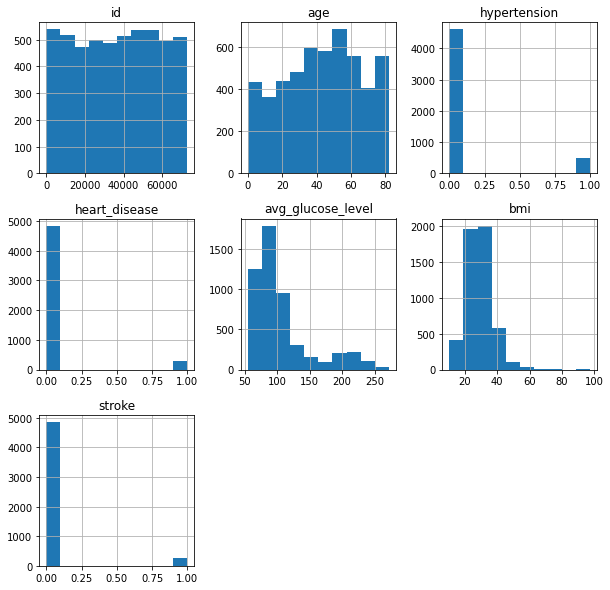

In [13]:
df.hist(figsize=(10,10))
plt.show()

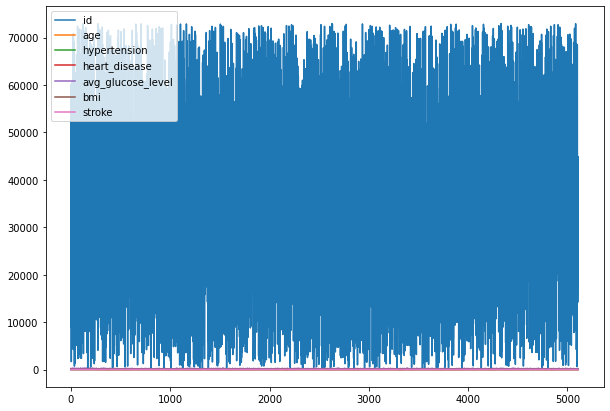

In [14]:
df.plot(figsize = (10,7))
plt.show()

numerical_features = 'age','hypertension','heart_disease','avg_glucose_level','bmi'	
catagorial_features = gender,ever_married,work_type ,Residence_type,smoking_status 


# 5. Applying Lable Encoding

In [15]:
def label_transform(x):
  le = LabelEncoder()
  Encoded_le = le.fit_transform(x)
  return Encoded_le

In [16]:
df_transformed = df.copy()
print("copy is created...")

copy is created...


In [17]:
catagoral_labels = ['gender','ever_married','work_type' ,'Residence_type','smoking_status']
for x in catagoral_labels:
  df_transformed[x] = label_transform(df_transformed[x])

In [18]:
df_transformed.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# 6. Scaling Of Numerical Data

In [19]:
scaler = StandardScaler()
df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi']] = scaler.fit_transform(df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi']])

In [20]:
df_transformed.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,1.001234e+00,1,1
1,51676,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,4.615554e-16,2,1
2,31112,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,4.685773e-01,2,1
3,60182,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,7.154182e-01,3,1
4,1665,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-6.357112e-01,2,1


# 7. Train And Test The Model

In [21]:
x_train, x_test, y_train, y_test =train_test_split(df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type' ,'Residence_type','smoking_status']],df_transformed["stroke"],test_size=0.20,random_state=21)
print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(4088, 10)
Shape of Test Xs:(1022, 10)
Shape of Training y:(4088,)
Shape of Test y:(1022,)


# 8. Build Model

In [22]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [23]:
y_pred= classifier.predict(x_test)  
y_pred[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# 9. Find Accuracy Of Model

In [24]:
print("accuracy of test set using linear regression",classifier.score(x_test,y_test))

accuracy of test set using linear regression 0.9461839530332681


# 10. Create Confusion Matrix

In [25]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix


array([[967,   5],
       [ 50,   0]])

In [26]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[967   5]
 [ 50   0]]
Normalized confusion matrix
[[0.99 0.01]
 [1.   0.  ]]


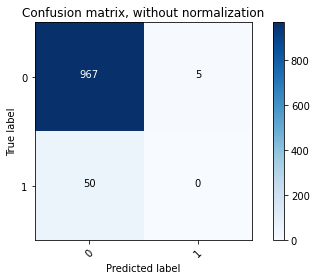

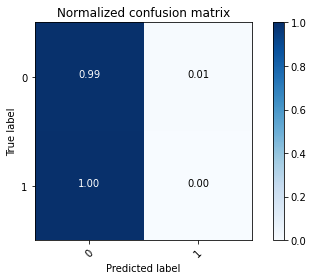

In [27]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()


# 11. Classification Report

In [28]:
from sklearn.metrics import classification_report
# print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [29]:
x = df_transformed[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type' ,'Residence_type','smoking_status']]
y = df_transformed['stroke']

# 12. Cross Validation On KNN Model

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
print(scores)


[0.95 0.95 0.95 0.95 0.95]


In [31]:
print("accuracy of model using cross validation",scores.mean())

accuracy of model using cross validation 0.9475538160469668


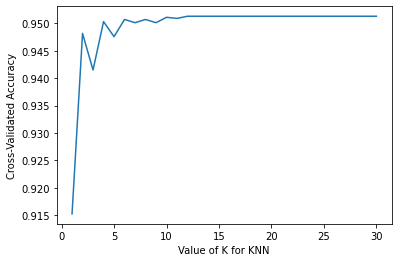

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Conclusion
1. KNN algorithm is used to predict strock prediction
2. Accuracy is almost 94%
3. Its better to use Cross- validation i.e. K-fold method to check Accuracy
4. We also Generate Classification Report